<span style="font-size:large;">
<div style="text-align: right">IM-UH 1511 <b>Introduction to Digital Humanities</b><br/>
Student name: <span style="color:blue"><b>X XX</b></span><br/>
Grade: <span style="color:red"><b></b></span><br/><br/></div>

## <span style="color:red">HOMEWORK 7a</span>
# <span style="color:green">Best Korean Movies in IMDb: Descriptive Statistics

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import pygraphviz
from networkx.drawing.nx_agraph import graphviz_layout
from networkx.drawing.nx_agraph import to_agraph 
import matplotlib.pyplot as plt
import matplotlib as mpl
from pylab import hist
import random
from collections import Counter
import operator
import itertools
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 
warnings.simplefilter('ignore')

In [2]:
allfilms = pd.read_csv('300KoreanFilms.csv', sep=',', encoding="utf-8")
films=allfilms.sample(100)
films = films.reset_index(drop=True)
print(len(films))
films

100


,TITLE,YEAR,DIRECTOR,STARS,GENRE
0,Ode to My Father,2014,JK Youn,"Jung-min Hwang, Yunjin Kim, Dal-su Oh, Jin-you...","Drama, War"
1,Midnight FM,2010,Sang Man Kim,"Soo Ae, Ji-Tae Yoo, Joon-Ha Lee, Dong-seok Ma","Action, Crime, Thriller"
2,Lady Vengeance,2005,Chan-wook Park,"Yeong-ae Lee, Min-sik Choi, Shi-hoo Kim, Yea-y...","Crime, Drama, Thriller"
3,Spider Forest,2004,Il-gon Song,"Woo-seong Kam, Jung Suh, Kyung-hun Kang, Hyun-...","Drama, Horror, Mystery"
4,Queer Movie Butterfly,2015,Inkyu Baek,"Daeyoung Kim, Yeongdeok Lim, Gwangmu Moon, Seu...",Drama
...,...,...,...,...,...
95,Address Unknown,2001,Ki-duk Kim (D),"Dong-kun Yang, Min-jung Ban, Young-min Kim, Eu...","Drama, War"
96,Secret Love,2010,Hoon-i Ryu,"Ji-Tae Yoo, Jin-Seo Yoon, Ye-jin Im, In-gi Jeong",Drama
97,Christmas in August,1998,Jin-ho Hur,"Suk-kyu Han, Eun-ha Shim, Goo Shin, Ji-hye Oh","Drama, Romance"
98,White Night,2009,Shin-woo Park,"Suk-kyu Han, Ye-jin Son, Soo Go, Cheol-woo Han","Mystery, Romance, Thriller"


In [3]:
titles=films.TITLE.tolist()
print(len(titles),len(set(titles)))

100 100


In [4]:
year=films.YEAR.tolist()
year=list(set(year))
print(len(year),min(year),max(year))
sorted(year)

20 1998 2018


[1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2018]

In [5]:
director=films.DIRECTOR.tolist()
director=sorted(list(set(director)))
print(len(director))
director

80


['Andrew Lau',
 'Beom-gu Cho',
 'Byeong-heon Lee',
 'Byeong-ki Ahn',
 'Byung-chun Min',
 'Chan-ok Park',
 'Chan-sang Lim',
 'Chan-wook Park',
 'Chang-dong Lee',
 'Cheol-ha Lee',
 'Dae-seung Kim',
 'Dae-woo Kim',
 'Dong-hoon Choi',
 'Dong-hyuk Hwang',
 'Geun-seop Jeong',
 'Gina Kim',
 'Gok Kim',
 'Heung-sun Jeong',
 'Ho-joon Kim',
 'Hong-Seung Yoon',
 'Hong-jin Na',
 'Hong-soo Park',
 'Hoon-i Ryu',
 'Hun Jang',
 'Hwan-kyung Lee',
 'Hyeon-seong Moon',
 'Hyeong-Joon Kim',
 'Hyeong-yoon Jang',
 'Hyung-rae Shim',
 'Il-Hyeong Lee',
 'Il-gon Song',
 'In-shik Kim',
 'Inkyu Baek',
 'JK Youn',
 'Jae-ho Park',
 'Jae-young Kwak',
 'Je-gu Yun',
 'Je-kyu Kang',
 'Jee-woon Kim',
 'Jeong-Yeol Choi',
 'Jeong-ho Lee',
 'Jin-ho Hur',
 'Jin-pyo Park',
 'John H. Lee',
 'Jong-Yeol Baek',
 'Jong-ho Huh',
 'Joon-Hwan Jang',
 'Joon-ho Bong (D)',
 'Joon-ik Lee',
 'July Jung',
 'Ki-duk Kim (D)',
 'Ki-hyeong Park',
 'Kim Kwang-tae',
 'Kwon-taek Im',
 'Kyung Ho Lee',
 'Lee Gi-Wook',
 'Man-dae Bong',
 'Moon-saeng K

In [6]:
s_films=pd.DataFrame()
for i in range(len(films)):
    d=dict(films.loc[i])
    sl= films.STARS[i].split(",")
    gl=films.GENRE[i].split(", ")
    for s in sl:
        for t in gl:
            d["ACTOR"]=s.strip()
            d['UGENRE']=t
            s_films=s_films.append(d,ignore_index=True)
s_films['YEAR'] = s_films['YEAR'].astype(int)
s_films.rename(columns={'GENRE':'MGENRE','UGENRE':'GENRE'}, inplace=True)
s_films=s_films[["YEAR","TITLE","DIRECTOR","ACTOR","GENRE"]]
df=s_films
print(len(df))
df.sort_values(by="YEAR").head(20)

926


,YEAR,TITLE,DIRECTOR,ACTOR,GENRE
341,1998,Whispering Corridors,Ki-hyeong Park,Roe-ha Kim,Drama
905,1998,Christmas in August,Jin-ho Hur,Ji-hye Oh,Romance
342,1998,Whispering Corridors,Ki-hyeong Park,Roe-ha Kim,Horror
332,1998,Whispering Corridors,Ki-hyeong Park,Kang-hee Choi,Drama
333,1998,Whispering Corridors,Ki-hyeong Park,Kang-hee Choi,Horror
334,1998,Whispering Corridors,Ki-hyeong Park,Kang-hee Choi,Mystery
898,1998,Christmas in August,Jin-ho Hur,Suk-kyu Han,Drama
899,1998,Christmas in August,Jin-ho Hur,Suk-kyu Han,Romance
900,1998,Christmas in August,Jin-ho Hur,Eun-ha Shim,Drama
901,1998,Christmas in August,Jin-ho Hur,Eun-ha Shim,Romance


In [7]:
df.to_csv('Random100KoreanFilms.csv',encoding='utf-8')

In [8]:
actor=df.ACTOR.tolist()
actor=sorted(list(set(actor)))
print(len(actor))
actor

305


['Ah-in Yoo',
 'Ahn Do-Gyoo',
 'Andrew Ableson',
 'Ayako Fujitani',
 'Ayumi Ito',
 'Blake Clark',
 'Bo-kyeong Kim',
 'Bo-seok Jeong',
 'Brad Sergi',
 'Byeon-chul Min',
 'Byung-Hun Lee',
 'Carla Gugino',
 'Cathy Cavadini',
 'Chae-eun Lee',
 'Chang Jung Lim',
 'Chang Yun',
 'Chang-Seok Ko',
 'Chen Chang',
 'Cheol-ho Choi',
 'Cheol-min Park',
 'Cheol-woo Han',
 'Choi Ah-ra',
 'Chris Evans',
 'Chung-Ah Lee',
 'D.J. Robbins',
 'Da-Geon',
 'Daeyoung Kim',
 'Dal-su Oh',
 'Daniel J. Edwards',
 'Danny Huston',
 'David Lee McInnis',
 'Dean Dawson',
 'Do-bin Baek',
 'Do-yeon Jeon',
 'Dong-Gun Jang',
 'Dong-hoon Ha',
 'Dong-kun Yang',
 'Dong-seok Ma',
 'Dong-won Gang',
 'Dong-wook Kim',
 'Doo-hong Jung',
 'Doona Bae',
 'Dorah Fine',
 'Duk-moon Choi',
 'Ed Harris',
 'Eol Lee',
 'Eui-sung Kim',
 'Eun-Kyung Shin',
 'Eun-ha Shim',
 'Eun-jin Pang (A)',
 'Eun-ju Lee',
 'Eun-kyung Shim',
 'Eun-pi Kang',
 'Ga-in Han',
 'Geoffrey Rush',
 'Geun-young Moon',
 'Gi-sub Jung',
 'Goo Shin',
 'Gook-hwan Jeon',
 '

In [9]:
unique_genre=df.GENRE.tolist()
unique_genre=sorted(list(set(unique_genre)))
print(len(unique_genre))
unique_genre

19


['Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western']

In [10]:
title=df.TITLE.tolist()
title=sorted(list(set(title)))
print(len(title))
title

100


['3 Extremes II',
 '71: Into the Fire',
 'A Girl at My Door',
 'A Hard Day',
 'A Violent Prosecuotr',
 'A man and a Woman',
 'Address Unknown',
 'Always',
 'Antarctic Journal',
 'Arahan',
 'Architecture 101',
 'As One',
 'Bad Guy',
 'Blind',
 'Bling',
 'Breath',
 'Broken',
 'Christmas in August',
 'Chunhyang',
 'Commitment',
 'Death Bell',
 'Deiji',
 'Finding Mr. Destiny',
 'Glory Day',
 'Hwang Jin Yi',
 'Hwayi: A Monster Boy',
 'Insane',
 'Joint Security Area',
 'Lady Vengeance',
 'Lost Flower Eo Woo-dong',
 'Memento Mori',
 'Midnight FM',
 'Miracle in Cell No.7',
 'Misbehavior',
 'Monstrum',
 'Montage',
 'Murderer',
 'My Little Bride',
 'My Love, My Bride',
 'My Wife is a Gangster 2',
 'Never Forever',
 'No Mercy',
 'Oasis',
 'Ode to My Father',
 'Office',
 'Painted Fire',
 'Paju',
 'Peppermint Candy',
 'Perfect Proposal',
 'Phantom: The Submarine',
 'Phone',
 'Queer Movie Butterfly',
 'Reptile 2001',
 'Samaritan Girl',
 'Save the Green Planet!',
 'Secret Love',
 'Seoul Station',
 'S

## Grouping per Year

In [11]:
gdf=df.groupby("YEAR").nunique()[["TITLE","DIRECTOR","ACTOR","GENRE"]]
gdf = gdf.reset_index()
gdf

,YEAR,TITLE,DIRECTOR,ACTOR,GENRE
0,1998,2,2,8,4
1,1999,5,5,19,6
2,2000,3,3,12,5
3,2001,3,2,12,3
4,2002,4,4,16,7
5,2003,4,4,14,7
6,2004,7,7,28,9
7,2005,4,4,16,7
8,2006,4,4,16,5
9,2007,6,6,24,7


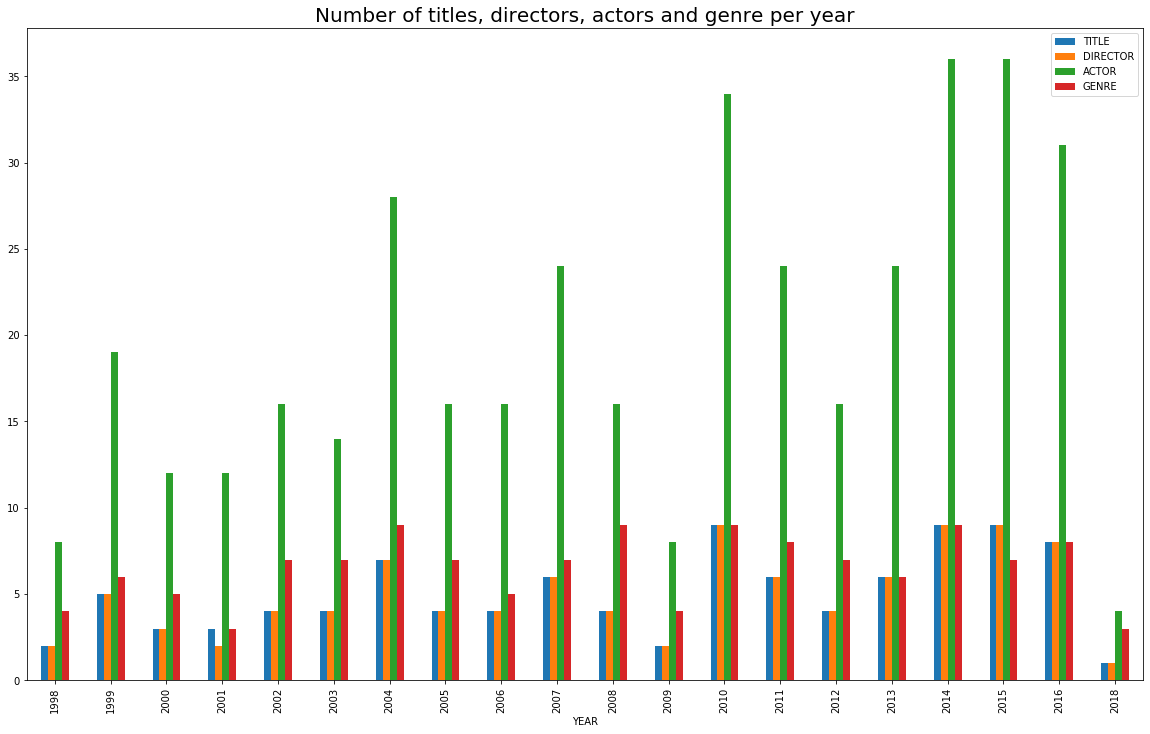

In [12]:
ax=gdf.plot(x='YEAR', y=["TITLE", "DIRECTOR", "ACTOR", "GENRE"], kind="bar",figsize=(20,12));
ax.set_title('Number of titles, directors, actors and genre per year', fontsize=20);

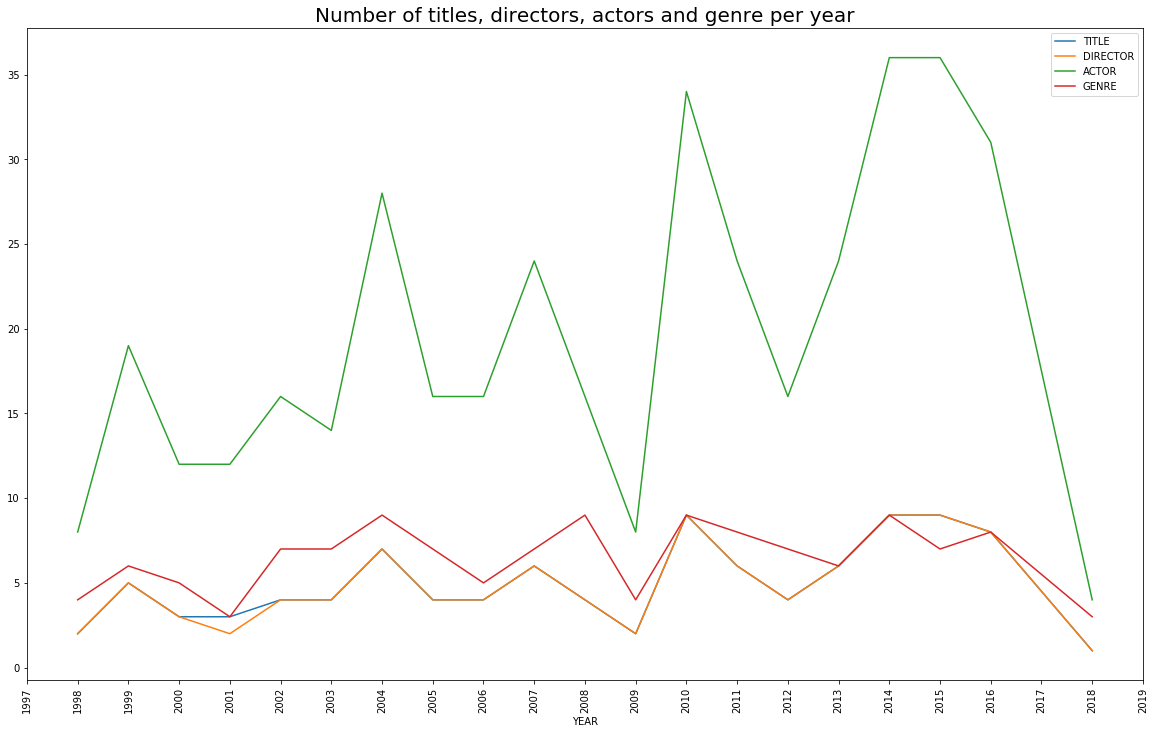

In [13]:
ax=gdf.plot(x='YEAR', y=["TITLE", "DIRECTOR", "ACTOR", "GENRE"], kind="line",figsize=(20,12));
plt.xticks(np.arange(1997, 2020, step=1),rotation='vertical');
ax.set_title('Number of titles, directors, actors and genre per year', fontsize=20);

## Grouping per Genre

In [14]:
ggdf=df.groupby("GENRE").nunique()[["YEAR","TITLE","DIRECTOR","ACTOR"]]
ggdf = ggdf.reset_index()
ggdf

,GENRE,YEAR,TITLE,DIRECTOR,ACTOR
0,Action,12,29,26,99
1,Adventure,2,2,2,8
2,Animation,4,5,4,20
3,Biography,2,2,2,8
4,Comedy,11,18,17,66
5,Crime,12,16,15,61
6,Drama,19,64,51,213
7,Family,1,1,1,4
8,Fantasy,5,5,5,20
9,History,5,5,5,20


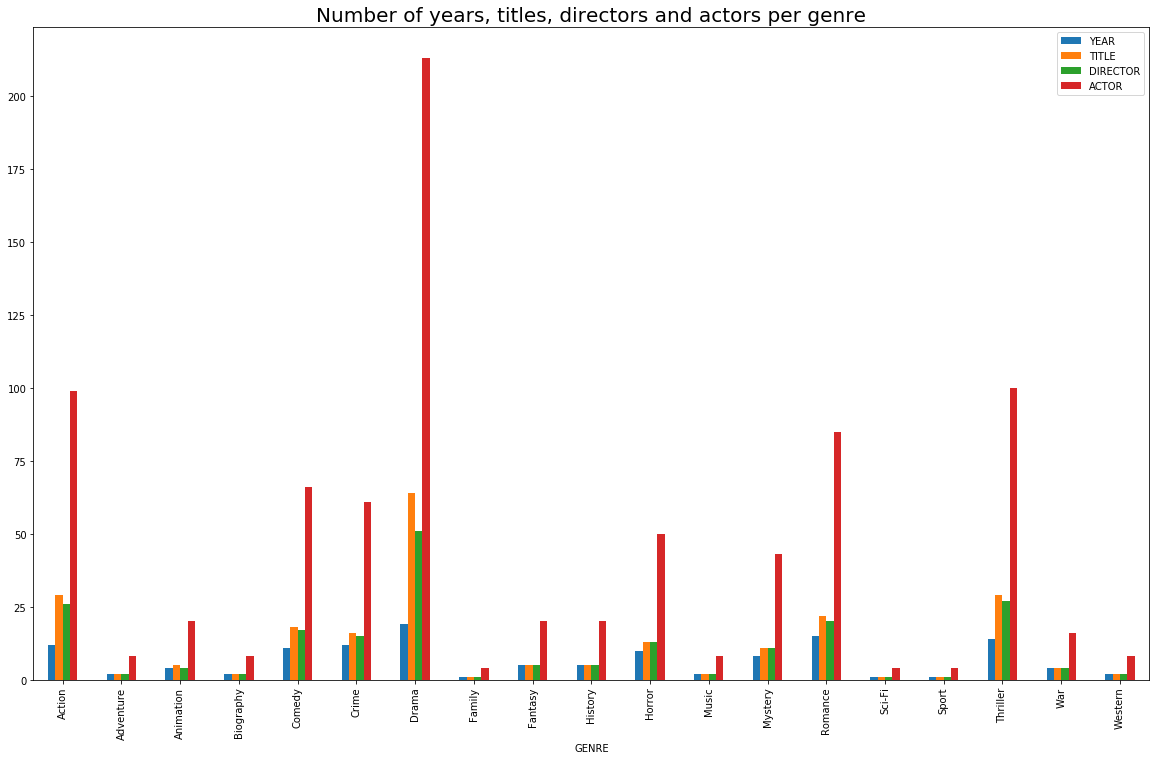

In [15]:
ax=ggdf.plot(x='GENRE', y=["YEAR","TITLE", "DIRECTOR", "ACTOR"], kind="bar",figsize=(20,12));
ax.set_title('Number of years, titles, directors and actors per genre', fontsize=20);

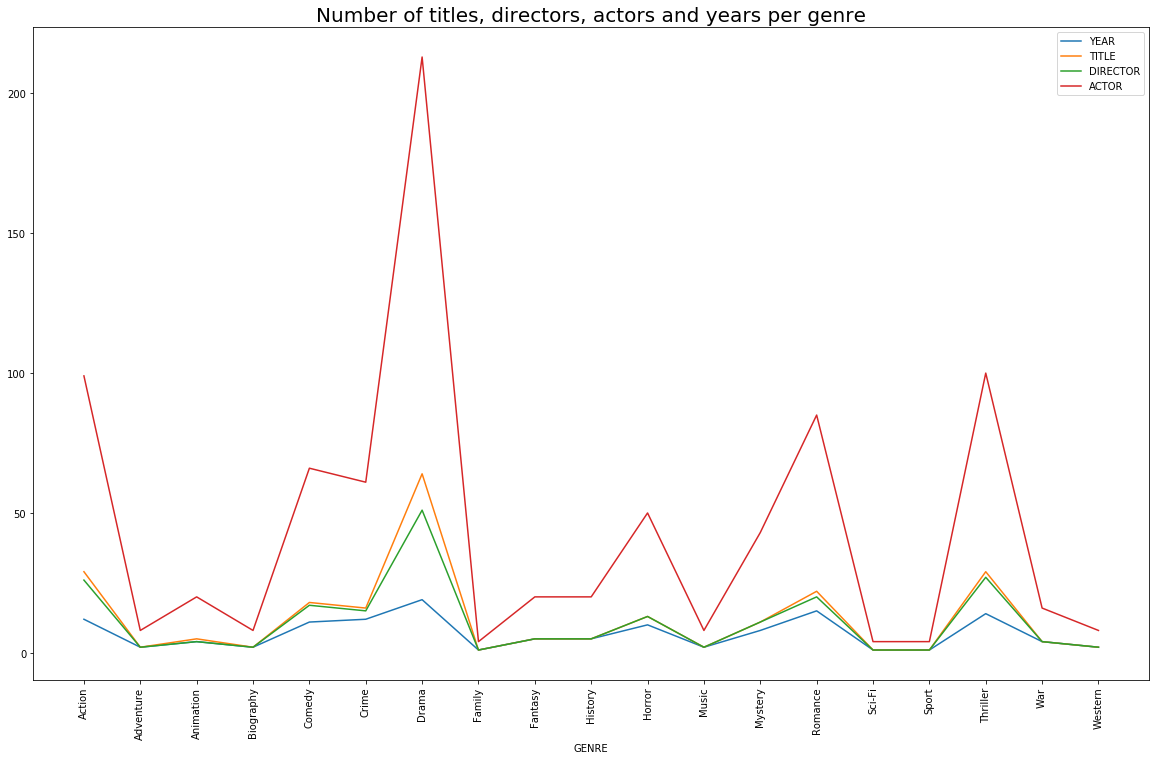

In [16]:
ax=ggdf.plot(x='GENRE', y=["YEAR", "TITLE", "DIRECTOR", "ACTOR"], kind="line",figsize=(20,12));
ax.set_xticks(np.arange(0, 19, step=1))
ax.set_xticklabels(unique_genre,rotation='vertical')
ax.set_title('Number of titles, directors, actors and years per genre', fontsize=20);

## Grouping per Director

In [17]:
dgdf=df.groupby("DIRECTOR").nunique()[["YEAR","TITLE","ACTOR",'GENRE']]
dgdf = dgdf.reset_index()
dgdf.sort_values(by="TITLE",ascending=False)

,DIRECTOR,YEAR,TITLE,ACTOR,GENRE
50,Ki-duk Kim (D),6,7,25,5
72,Tae-yong Kim,3,3,12,4
12,Dong-hoon Choi,2,2,7,3
30,Il-gon Song,2,2,8,5
46,Joon-Hwan Jang,2,2,8,5
...,...,...,...,...,...
27,Hyeong-yoon Jang,1,1,4,3
26,Hyeong-Joon Kim,1,1,4,3
25,Hyeon-seong Moon,1,1,4,2
24,Hwan-kyung Lee,1,1,4,2


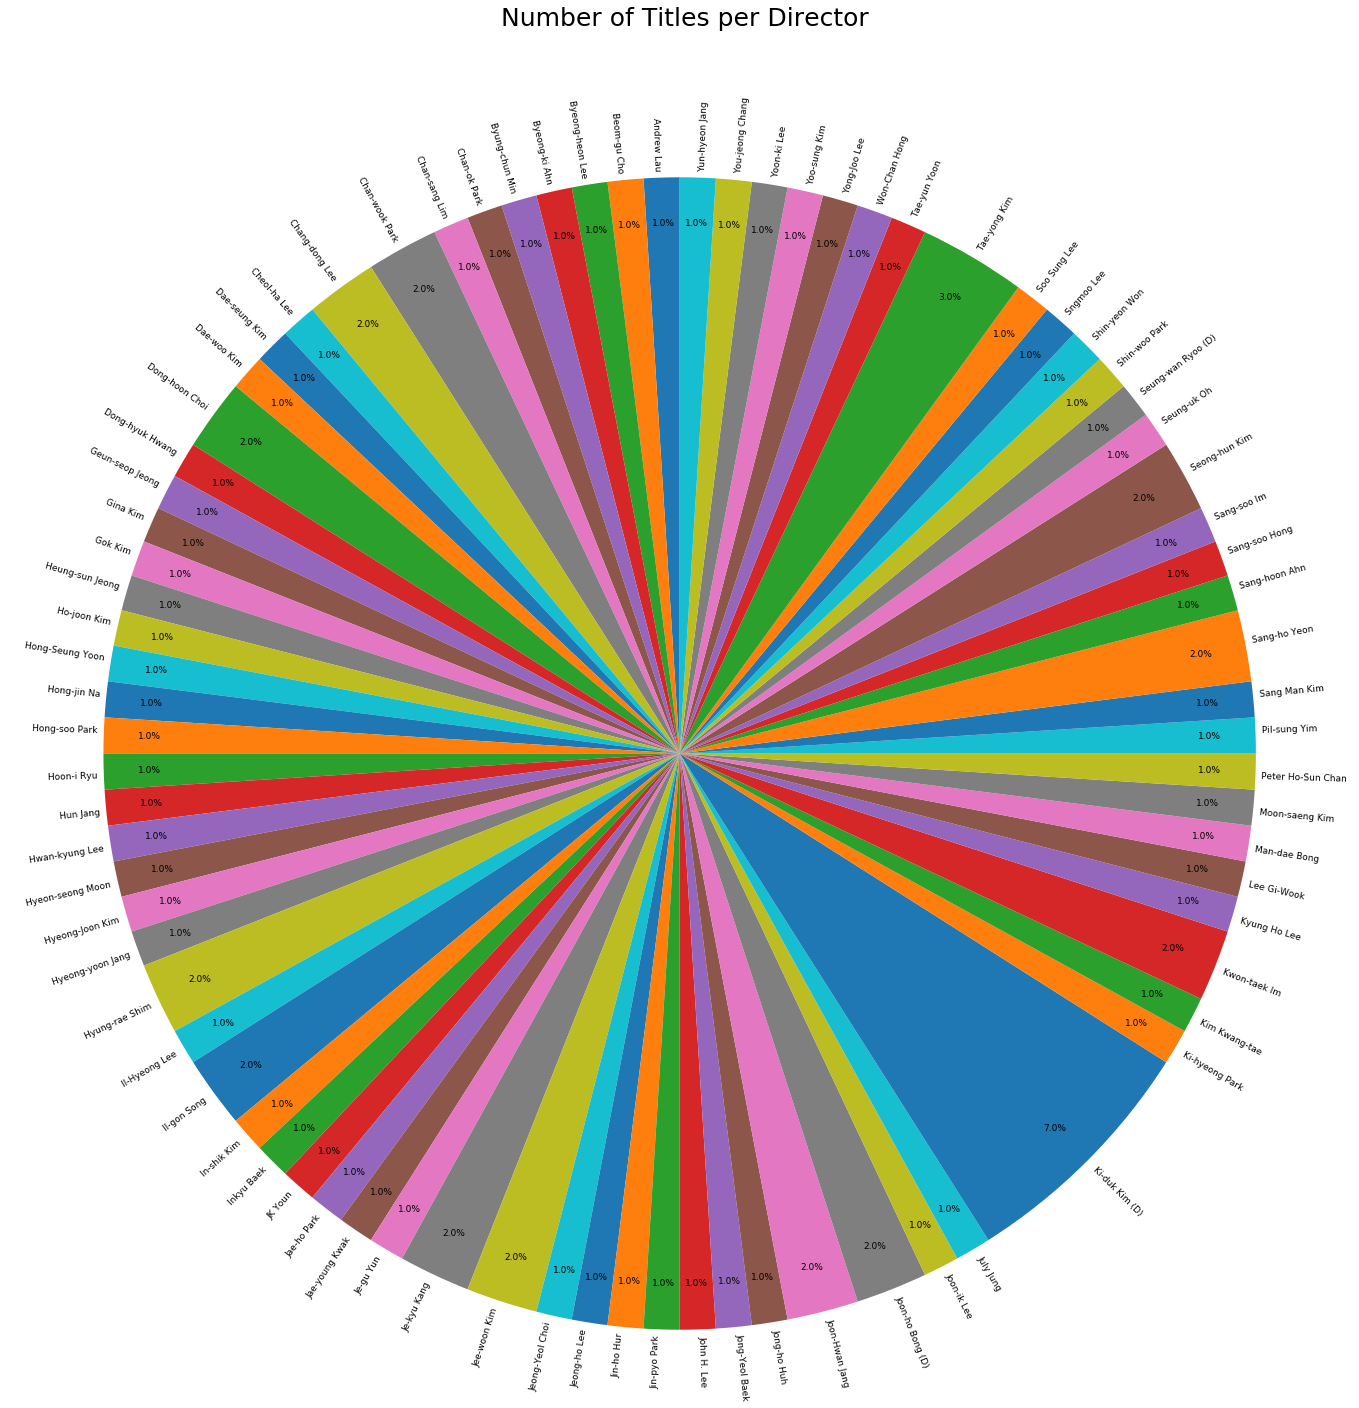

In [18]:
close = dgdf
mpl.rcParams['font.size'] = 12.0
fig = plt.figure(figsize=(20,20))
plt.pie(
    close['TITLE'],
    labels=close['DIRECTOR'],
    shadow=False,
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    rotatelabels=True,labeldistance=1.01,textprops={'fontsize':9},pctdistance=0.92
    )

# View the plot drop above
plt.axis('equal')

# View the plot
ss="Number of Titles per Director"
plt.suptitle(ss,fontsize=25)
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

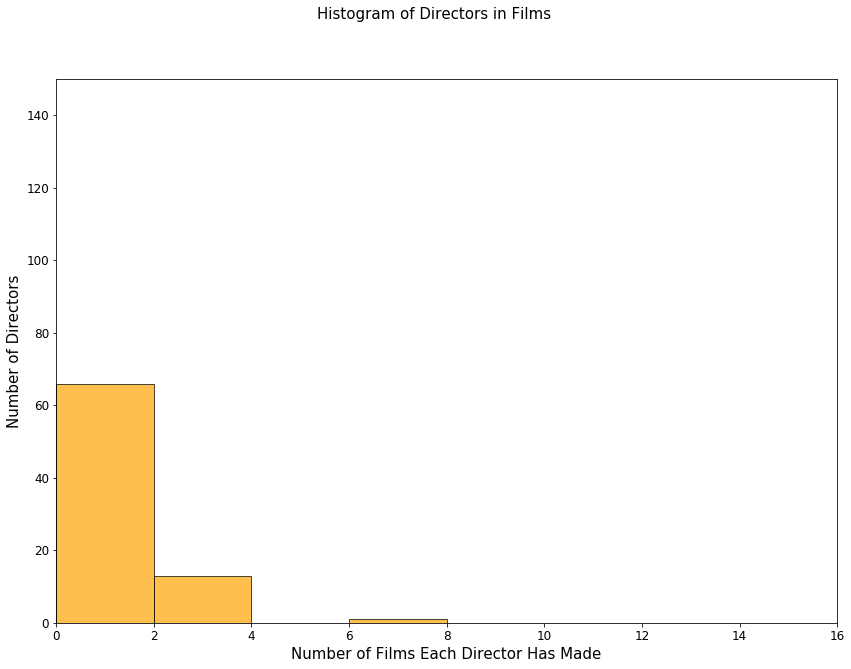

In [19]:
x=dgdf.TITLE.tolist()
fig = plt.figure(figsize=(14,10))
plt.hist(x,bins = [0,2,4,6,8,10,12,14,16],edgecolor='black',color="orange",alpha=0.7) 
plt.axis([0, 16, 0, 150])
plt.xlabel("Number of Films Each Director Has Made",fontsize=15)
plt.ylabel("Number of Directors",fontsize=15)
plt.xticks([0,2,4,6,8,10,12,14,16])
plt.suptitle("Histogram of Directors in Films",fontsize=15) 
plt.show()

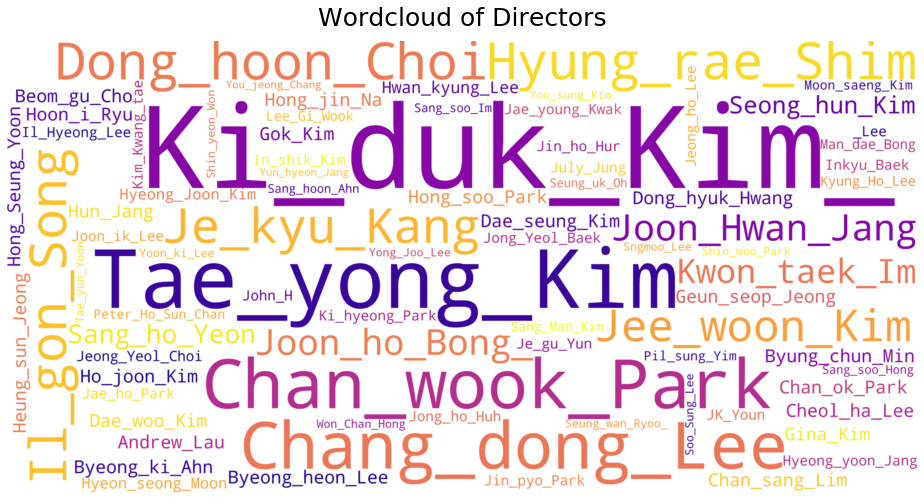

In [20]:
subsetd = dgdf[['DIRECTOR', 'TITLE']]
tuplesd = [tuple(x) for x in subsetd.values]

t=[]
for (i,j) in tuplesd:
    for k in range(j):
#         print(i.replace(" ","_").replace("-","_"))
        t.append(i.replace(" ","_").replace("-","_"))
ttd=' '.join(t)

wordcloud = WordCloud(collocations=False,background_color="white",colormap="plasma",width=4000,height=2000).generate(ttd)
fig = plt.figure(figsize=(13,13))
default_colors = wordcloud.to_array()
plt.imshow(default_colors, interpolation="bilinear")
plt.axis("off")
ss="Wordcloud of Directors"
plt.suptitle(ss,fontsize=25)
plt.tight_layout(rect=[0, 0, 1, 1.4]) 
plt.show()

## Grouping per Actor

In [21]:
agdf=df.groupby("ACTOR").nunique()[["YEAR","DIRECTOR","TITLE",'GENRE']]
agdf = agdf.reset_index()
agdf.sort_values(by="TITLE",ascending=False)

,ACTOR,YEAR,DIRECTOR,TITLE,GENRE
168,Kyung-gu Sol,4,4,5,5
156,Kang-ho Song,5,4,5,7
153,Jung-woo Ha,4,3,4,6
84,Hye-su Kim,4,3,4,7
117,Ji-Tae Yoo,3,4,4,8
...,...,...,...,...,...
119,Ji-Young Park,1,1,1,3
120,Ji-hye Oh,1,1,1,2
121,Ji-hyeon Kim,1,1,1,2
122,Ji-min Kwak,1,1,1,1


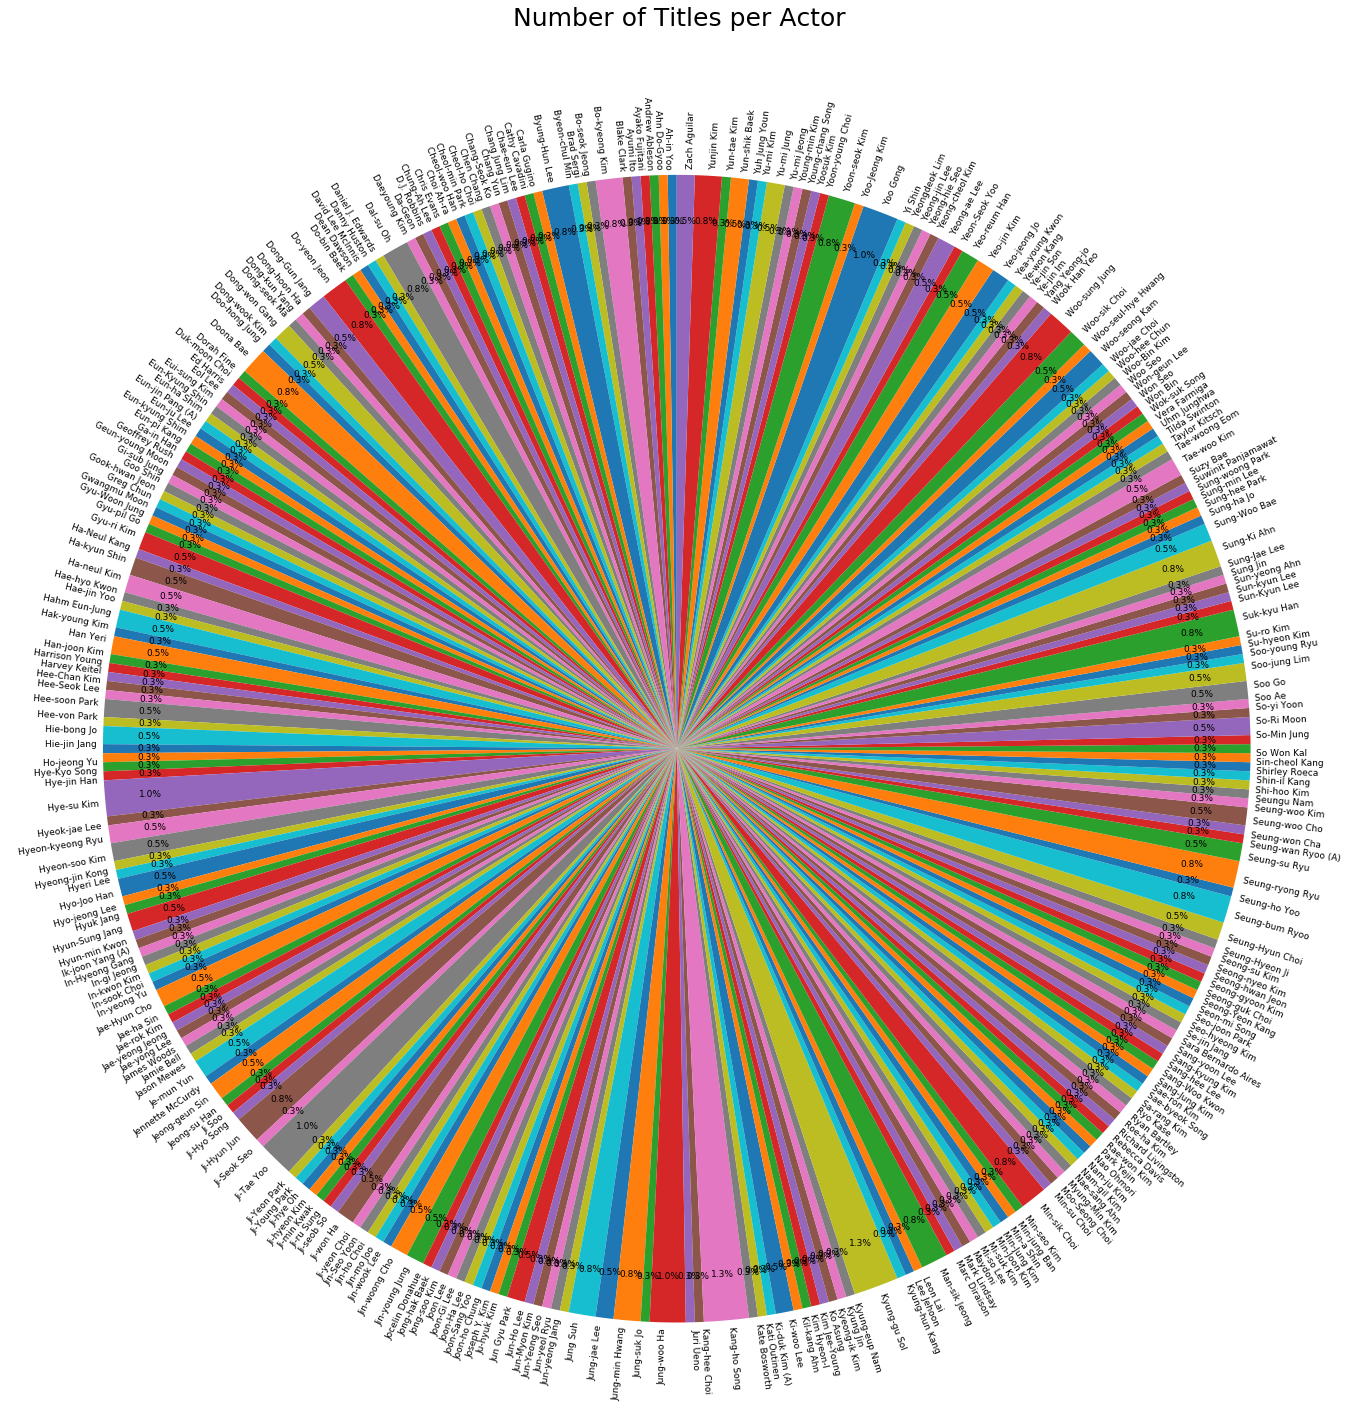

In [22]:
aclose = agdf
mpl.rcParams['font.size'] = 12.0
fig = plt.figure(figsize=(20,20))
plt.pie(
    aclose['TITLE'],
    labels=aclose['ACTOR'],
    shadow=False,
    startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    rotatelabels=True,labeldistance=1.01,textprops={'fontsize':9},pctdistance=0.92
    )

# View the plot drop above
plt.axis('equal')

# View the plot
ss="Number of Titles per Actor"
plt.suptitle(ss,fontsize=25)
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

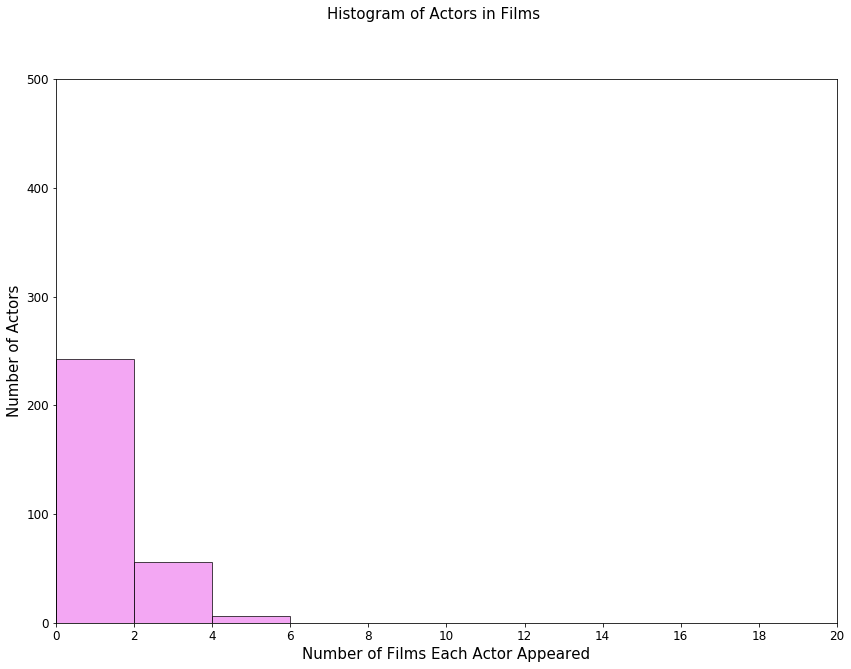

In [23]:
x=agdf.TITLE.tolist()
fig = plt.figure(figsize=(14,10))
plt.hist(x,bins = [0,2,4,6,8,10,12,14,16,18,20],edgecolor='black',color="violet",alpha=0.7) 
plt.axis([0, 20, 0, 500])
plt.xlabel("Number of Films Each Actor Appeared",fontsize=15)
plt.ylabel("Number of Actors",fontsize=15)
plt.xticks([0,2,4,6,8,10,12,14,16,18,20])
plt.suptitle("Histogram of Actors in Films",fontsize=15) 
plt.show()

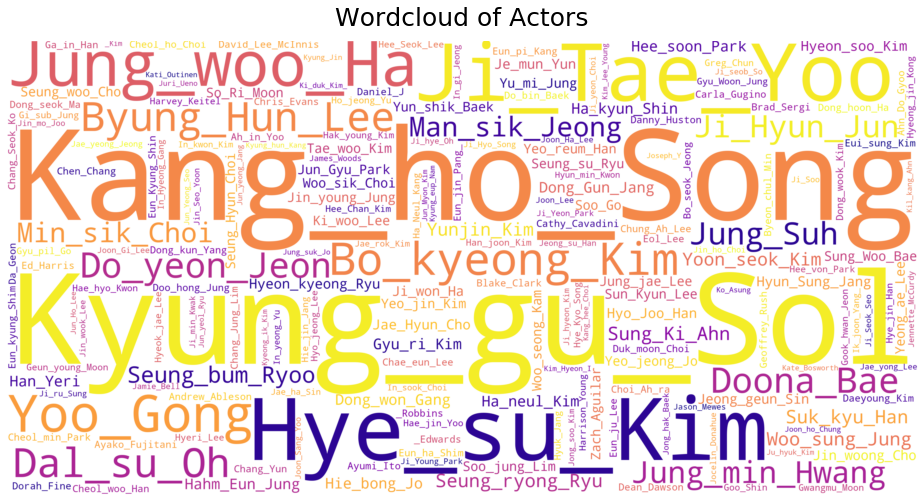

In [24]:
subset = agdf[['ACTOR', 'TITLE']]
tuples = [tuple(x) for x in subset.values]

t=[]
for (i,j) in tuples:
    for k in range(j):
#         print(i.replace(" ","_").replace("-","_"))
        t.append(i.replace(" ","_").replace("-","_"))
tt=' '.join(t)

wordcloud = WordCloud(collocations=False,background_color="white",colormap="plasma",width=4000,height=2000).generate(tt)
fig = plt.figure(figsize=(13,13))
default_colors = wordcloud.to_array()
plt.imshow(default_colors, interpolation="bilinear")
plt.axis("off")
ss="Wordcloud of Actors"
plt.suptitle(ss,fontsize=25)
plt.tight_layout(rect=[0, 0, 1, 1.4])
plt.show()